### Import packages

In [1]:
import pandas as pd
import numpy as np
import merging_functions as mf ### this package included part of the code that are repeated
                                 # throughout to make it more efficient
import matplotlib.pyplot as plt

### Define city and work folder

In [2]:
city='Chicago'

FIPS = [17031, 17043, 17089, 17093, 17097, 17111, 17197]

folder = 'Input_Files/'+city+'/'
out_folder = 'Output/'

### Load neighborhood income level data

In [9]:
### Load file
raw_neigh_income=pd.read_stata(folder+'neighb_inc_level_053119.dta')

# ## Rename trtid10 to FIPS and reformat number
raw_neigh_income = raw_neigh_income.rename(columns = {'stctytrct':'trtid10'})
neigh_income = mf.trtid10_to_FIPS(raw_neigh_income)

### Keep only records for the census tracts defined in FIPS variable
neigh_income['FIPS_temp']=neigh_income['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
neigh_income = neigh_income[neigh_income['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
neigh_income = neigh_income.drop(columns='FIPS_temp')

### Keep only relevant columns
neigh_income = neigh_income[['FIPS', 'reg_med_inc60_17', 'reg_med_inc120_17', 'reg_med_inc80_17',
                             'low_pdmt_80120', 'mod_pdmt_80120', 'high_pdmt_80120', 'low_pdmt_55cut_80120_medhhinc',
                             'high_pdmt_55cut_80120_medhhinc', 'mod_pdmt_55cut_80120_medhhinc',
                             'mix_low_55cut_80120_medhhinc', 'mix_mod_55cut_80120_medhhinc',
                             'mix_high_55cut_80120_medhhinc', 'inc_cat_55cut_80120_medhhinc']]

neigh_income.head() ### should be converted to dummies, but this should be changed from the variable definition

['17031', '17043', '17089', '17093', '17097', '17111', '17197']


,FIPS,reg_med_inc60_17,reg_med_inc120_17,reg_med_inc80_17,low_pdmt_80120,mod_pdmt_80120,high_pdmt_80120,low_pdmt_55cut_80120_medhhinc,high_pdmt_55cut_80120_medhhinc,mod_pdmt_55cut_80120_medhhinc,mix_low_55cut_80120_medhhinc,mix_mod_55cut_80120_medhhinc,mix_high_55cut_80120_medhhinc,inc_cat_55cut_80120_medhhinc
0,17031010100,38362.800781,76725.601562,51150.398438,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,17031010201,38362.800781,76725.601562,51150.398438,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,17031010202,38362.800781,76725.601562,51150.398438,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,17031010300,38362.800781,76725.601562,51150.398438,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,17031010400,38362.800781,76725.601562,51150.398438,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


##### The Stata code uses the file Chicago_merge_0805aff_approach.dta as a base merging file. However, the file available is already the output of the merge data. As a base input file, the shp file with the census tract of the region of interest will be used.

In [10]:
import geopandas as gpd
city_shp = gpd.read_file(folder+'shp/cb_2017_17_tract_500k.shp')
print('The counties included in this shp are:', str(city_shp['COUNTYFP'].unique()))

### Keep only records for the census tracts defined in FIPS variable
city_shp['FIPS_temp']=str(17)+city_shp['COUNTYFP'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print('The only counties that are considered are:', str_FIPS)
city_shp = city_shp[city_shp['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
city_shp = city_shp.drop(columns='FIPS_temp')

### Keep only the ID and the geometry type
print('The columns included in the original file are:', list(city_shp.columns))
city_shp = city_shp[['GEOID', 'COUNTYFP', 'geometry']]
city_shp = city_shp.rename(columns={'GEOID':'FIPS'})
print ('There are '+str(len(city_shp))+' census tracts in this city')
city_shp.head()

The counties included in this shp are: ['001' '011' '019' '029' '031' '037' '043' '049' '057' '061' '077' '083'
 '089' '091' '095' '097' '099' '111' '113' '115' '119' '125' '137' '143'
 '157' '161' '163' '167' '179' '183' '195' '197' '201' '045' '063' '073'
 '081' '007' '015' '021' '025' '103' '107' '117' '121' '127' '135' '145'
 '159' '173' '177' '185' '191' '199' '033' '017' '187' '189' '105' '051'
 '003' '005' '023' '027' '153' '047' '053' '055' '101' '109' '059' '171'
 '065' '071' '075' '165' '181' '079' '085' '087' '123' '035' '039' '129'
 '131' '133' '041' '141' '093' '193' '147' '149' '151' '203' '067' '069'
 '013' '169' '155' '139' '175' '009']
The only counties that are considered are: ['17031', '17043', '17089', '17093', '17097', '17111', '17197']
The columns included in the original file are: ['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD', 'ALAND', 'AWATER', 'geometry']
There are 1983 census tracts in this city


,FIPS,COUNTYFP,geometry
0,17031010201,031,"POLYGON ((-87.684653 42.019485, -87.680448 42...."
1,17031030200,031,"POLYGON ((-87.67062299999999 41.998075, -87.66..."
2,17031031700,031,"POLYGON ((-87.667497 41.9689, -87.666198999999..."
3,17031031900,031,"POLYGON ((-87.67407799999999 41.965169, -87.66..."
4,17031050200,031,"POLYGON ((-87.688683 41.961313, -87.68383 41.9..."


#### Neighborhood income
This includes 55% cut off for AMI predominance & 80-120 AMI cut offs

In [13]:
city_shp = city_shp.merge(neigh_income, on = 'FIPS', how = 'left')
# len(city_shp_merge)

## Methodology changes - New Approach

#### Income breakdowns for year 2000

In [19]:
raw_income_group = pd.read_stata(folder + '2000_Incomegroups.dta')
raw_income_group.columns

### Not going to use the countymedian_income. Will ue region median income instead.
### This value is provided in "inc_groups_hh by income_testing cutoffs_053119"
### Madeline defined RMI for 2017, but not for 2000 - how did she do it?

Index(['FIPS', 'NAME', 'QName', 'NATION', 'STATE', 'COUNTY', 'CT', 'T090_001',
       'T090_002', 'T090_003', 'T090_004', 'T090_005', 'T090_006', 'T090_007',
       'T090_008', 'T090_009', 'T090_010', 'T090_011', 'T090_012', 'T090_013',
       'T090_014', 'T090_015', 'T090_016', 'T090_017', 'AREALAND', 'AREAWATR',
       'SUMLEV', 'GEOCOMP', 'REGION', 'DIVISION', 'countymedian_income00',
       '_merge'],
      dtype='object')

In [20]:
### This is supposed to contain HH income for 2017, but it only has 2016 data
### Apparently it doesn't matter bc I only care about 2000 data? This is weird
raw_income_region = pd.read_stata(folder + 'hhinc_singleregion.dta')

### Rename trtid10 to FIPS and reformat number
income_region = mf.trtid10_to_FIPS(raw_income_region)

### Keep only relevant columns
income_region = income_region[['FIPS', 'hinc_00']]

### Keep only records for the census tracts defined in FIPS variable
income_region['FIPS_temp']=income_region['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
income_region = income_region[income_region['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
income_region = income_region.drop(columns='FIPS_temp')

### Following the code
income_group = raw_income_group.drop(columns = ['_merge'])
income_group = income_group.merge(income_region, on = 'FIPS', how = 'left')

### Keep only relevant columns
income_group = income_group.drop(columns = ['AREALAND', 'AREAWATR', 'SUMLEV', 'GEOCOMP', 'REGION', 'DIVISION'])

### Rename variables
income_group = income_group.rename(columns = {'hinc_00':'med_inc',
                                              'T090_001':'denominator_00', ### What is this number? - Total HH?
                                              'T090_002':'I_10000',
                                              'T090_003':'I_15000',
                                              'T090_004':'I_20000',
                                              'T090_005':'I_25000',
                                              'T090_006':'I_30000',
                                              'T090_007':'I_35000',
                                              'T090_008':'I_40000',
                                              'T090_009':'I_45000',
                                              'T090_010':'I_50000',
                                              'T090_011':'I_60000',
                                              'T090_012':'I_75000',
                                              'T090_013':'I_100000',
                                              'T090_014':'I_125000',
                                              'T090_015':'I_150000',
                                              'T090_016':'I_200000',
                                              'T090_017':'I_201'})
income_group.columns

['17031', '17043', '17089', '17093', '17097', '17111', '17197']


Index(['FIPS', 'NAME', 'QName', 'NATION', 'STATE', 'COUNTY', 'CT',
       'denominator_00', 'I_10000', 'I_15000', 'I_20000', 'I_25000', 'I_30000',
       'I_35000', 'I_40000', 'I_45000', 'I_50000', 'I_60000', 'I_75000',
       'I_100000', 'I_125000', 'I_150000', 'I_200000', 'I_201',
       'countymedian_income00', 'med_inc'],
      dtype='object')

#### Determining AMI - Look at other code

In [21]:
# ****** DETERMINING AMI *********
# * issue - how do I assign AMI - use Madeline's median of median method (mentioned in Neighb income read.me)
# * accidentally deleted a file from Neighb Income Level Archive file while looking for median-of-tract-medians method
# * intended to run my own median-of-medians method to determine 2000 AMI >> Do file to be found in:
# 	* Typologies > Master Datasets > Updated Typologies Summer 2019 ///
# 		* > Accessory Typology Processing> Regional AMIs - Median of Medians Method

# *Kamene definition: Atlanta - $ 51,760.11
# *Kamene definition: Chicago - $ 42,917
# *Kamene definition: Denver - $ 65,785.05
# *Kamene definition: Memphis - $ 44,560.60


# * CODE from Income Interpolation 1990 2000 2016.do
reg_med_inc_00 = 42917

#### Creates income cutoffs

In [22]:
income_group.describe()

,denominator_00,I_10000,I_15000,I_20000,I_25000,I_30000,I_35000,I_40000,I_45000,I_50000,I_60000,I_75000,I_100000,I_125000,I_150000,I_200000,I_201,countymedian_income00,med_inc
count,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3123.000000,1983.000000
mean,1471.560397,122.812880,80.898750,80.271067,85.641141,86.401794,88.529958,83.638577,81.978533,73.146107,138.223005,167.108619,170.381288,89.911567,43.170138,38.146748,41.300224,47512.573487,47750.800781
std,588.969423,115.728689,56.893851,50.673531,52.152860,50.786986,49.896535,47.582051,46.107768,40.130943,72.678075,94.257366,112.274563,78.291082,44.624216,50.750576,78.427772,10225.181273,28410.117188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24946.000000,0.000000
25%,1058.000000,49.274143,37.310110,42.000000,46.000000,48.000000,52.000000,49.000000,48.879561,43.285164,86.000000,97.000000,82.000000,30.000000,10.000000,6.000000,6.000000,41532.000000,27887.373047
50%,1413.000000,91.000000,71.000000,72.000000,78.000000,80.851916,83.000000,78.000000,77.421576,69.664460,131.000000,157.000000,150.312689,66.005677,28.000000,18.000000,15.000000,45922.000000,42917.000000
75%,1823.000000,159.999895,112.000000,108.206160,116.000000,116.000000,116.002274,111.000000,108.000000,97.000000,180.000000,224.062522,241.910490,130.229245,62.000000,49.035380,39.000000,45922.000000,60222.500000
max,4975.000000,1243.999200,409.000000,364.000000,337.000000,491.000000,443.000000,377.000000,345.000000,258.909143,502.000000,646.000000,618.000000,481.000000,266.987615,368.001039,874.701651,67887.000000,271762.437500


In [23]:
### percent of HH in each income category
number = ['10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000', '50000', '60000', '75000',
          '100000', '125000', '150000', '200000']
column = list()
for i in number:
    print(i)
    column.append('prop_'+i)
    income_group['prop_'+i] = income_group['I_'+i]/income_group['denominator_00']
print(column)

10000
15000
20000
25000
30000
35000
40000
45000
50000
60000
75000
100000
125000
150000
200000
['prop_10000', 'prop_15000', 'prop_20000', 'prop_25000', 'prop_30000', 'prop_35000', 'prop_40000', 'prop_45000', 'prop_50000', 'prop_60000', 'prop_75000', 'prop_100000', 'prop_125000', 'prop_150000', 'prop_200000']


###### Determines 80% cutoff

In [24]:
### 80% cutoff of the regional median income
df = income_group
reg_med_inc80_00 = 0.8*reg_med_inc_00

df['inc80_cumulative'] = 0
df['inc80_00'] = 0

### percent of HH in each income category
number = ['10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000']
for i in number:
    a = int(i)
    b = a + 4999.99
    prop = str(int(i) + 5000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)

number = ['50000']
for i in number:
    a = int(i)
    b = a + 9999.99
    prop = str(int(i) + 10000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)

number = ['60000']
for i in number:
    a = int(i)
    b = a + 14999.99
    prop = str(int(i) + 15000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)

number = ['75000', '100000', '125000']
for i in number:
    a = int(i)
    b = a + 24999.99
    prop = str(int(i) + 25000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)

number = ['150000']
for i in number:
    a = int(i)
    b = a + 49999.99
    prop = str(int(i) + 50000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)
    
df = df.drop(columns = ['inc80_cumulative'])

10000
15000
20000
25000
30000
35000
40000
45000
50000
60000
75000
100000
125000
150000


###### Determines 120% cutoff

In [25]:
df = income_group
reg_med_inc120_00 = 1.2*reg_med_inc_00

df['inc120_cumulative'] = 0
df['inc120_00'] = 0


### percent of HH in each income category
number = ['10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000']
for i in number:
    a = int(i)
    b = a + 4999.99
    prop = str(int(i) + 5000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)

number = ['50000']
for i in number:
    a = int(i)
    b = a + 9999.99
    prop = str(int(i) + 10000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)

number = ['60000']
for i in number:
    a = int(i)
    b = a + 14999.99
    prop = str(int(i) + 15000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)

number = ['75000', '100000', '125000']
for i in number:
    a = int(i)
    b = a + 24999.99
    prop = str(int(i) + 25000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)

number = ['150000']
for i in number:
    a = int(i)
    b = a + 49999.99
    prop = str(int(i) + 50000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)
    
df = df.drop(columns = ['inc120_cumulative'])

10000
15000
20000
25000
30000
35000
40000
45000
50000
60000
75000
100000
125000
150000


###### Generate share of each income group

In [26]:
income_group['low_80120_00'] = income_group['inc80_00']
income_group['mod_80120_00'] = income_group['inc120_00'] - income_group['inc80_00']
income_group['high_80120_00'] = 1 - income_group['inc120_00']
income_group.head(3)

,FIPS,NAME,QName,NATION,STATE,COUNTY,CT,denominator_00,I_10000,I_15000,...,prop_125000,prop_150000,prop_200000,inc80_cumulative,inc80_00,inc120_cumulative,inc120_00,low_80120_00,mod_80120_00,high_80120_00
0,17001000100,Census Tract 1,"Census Tract 1, Adams County, Illinois",00,17,001,000100,1959.0,173.0,150.0,...,0.016335,0.0,0.000000,0.990812,0.526362,0.990812,0.746405,0.526362,0.220043,0.253595
1,17001000201,Census Tract 2.01,"Census Tract 2.01, Adams County, Illinois",00,17,001,000201,811.0,60.0,95.0,...,0.000000,0.0,0.008631,0.991369,0.556765,0.991369,0.832557,0.556765,0.275792,0.167443
2,17001000202,Census Tract 2.02,"Census Tract 2.02, Adams County, Illinois",00,17,001,000202,1099.0,132.0,85.0,...,0.000000,0.0,0.000000,0.990901,0.561305,0.990901,0.777210,0.561305,0.215905,0.222790


In [27]:
### Excludes CT without data
### According to stata code comment, I should have 25 CT without data, but I have zero
df = income_group
df['validsample'] = np.where((df['inc80_00'] == 0)|(df['inc120_00'] == 0), 0, 1)
df['validsample'].describe()

count    3123.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: validsample, dtype: float64

In [28]:
df = income_group

### Low income
df['low_pdmt_80120'] = np.where((df['low_80120_00']>=0.5)&(df['mod_80120_00']<0.4)&(df['high_80120_00']<0.4),1,0)
df['low_pdmt_80120'][df['validsample']==0] = 0

## High income
df['high_pdmt_80120'] = np.where((df['low_80120_00']<0.4)&(df['mod_80120_00']<0.4)&(df['high_80120_00']>=0.5),1,0)
df['high_pdmt_80120'][df['validsample']==0] = 0

### Moderate income
df['mod_pdmt_80120'] = np.where((df['low_80120_00']<0.4)&(df['mod_80120_00']>=0.5)&(df['high_80120_00']<0.4),1,0)
df['mod_pdmt_80120'][df['validsample']==0] = 0

### Mixed-Low income
df['mix_low_80120'] = np.where((df['low_80120_00']>=0.4)&(df['mod_80120_00']<0.35)&(df['high_80120_00']<0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0),1,0)
df['mix_low_80120'][df['validsample']==0] = 0
### Mixed-Moderate income
df['mix_mod_80120'] = np.where((df['low_80120_00']<0.35)&(df['mod_80120_00']>=0.4)&(df['high_80120_00']<0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0),1,0)
df['mix_mod_80120'][df['validsample']==0] = 0

### Mixed-High income
df['mix_high_80120'] = np.where((df['low_80120_00']<0.35)&(df['mod_80120_00']<0.35)&(df['high_80120_00']>=0.4)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0),1,0)
df['mix_high_80120'][df['validsample']==0] = 0

### Mixed-Low-Mod income
df['mix_l_m_80120'] = np.where((df['low_80120_00']>=0.35)&(df['mod_80120_00']>=0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0)&
                               (df['mix_low_80120']==0)&(df['mix_mod_80120']==0)&(df['mix_high_80120']==0),1,0)
df['mix_l_m_80120'][df['validsample']==0] = 0

### Mixed-Mod-High income
### Mixed-Low-Mod income
df['mix_m_h_80120'] = np.where((df['mod_80120_00']>=0.35)&(df['high_80120_00']>=0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0)&
                               (df['mix_low_80120']==0)&(df['mix_mod_80120']==0)&(df['mix_high_80120']==0),1,0)
df['mix_m_h_80120'][df['validsample']==0] = 0

### Mixed-Low-High income
df['mix_l_h_80120'] = np.where((df['low_80120_00']>=0.35)&(df['high_80120_00']>=0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0)&
                               (df['mix_low_80120']==0)&(df['mix_mod_80120']==0)&(df['mix_high_80120']==0),1,0)
df['mix_l_h_80120'][df['validsample']==0] = 0

### Mixed-Uni income
df['mix_uni_80120'] = np.where((df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0)&
                               (df['mix_low_80120']==0)&(df['mix_mod_80120']==0)&(df['mix_high_80120']==0)&
                               (df['mix_l_m_80120']==0)&(df['mix_m_h_80120']==0)&(df['mix_l_h_80120']==0),1,0)
df['mix_uni_80120'][df['validsample']==0] = 0

C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is

###### Compute income categories

In [29]:
income_group['inc_cat_80120'] = 0
income_group.loc[income_group['low_pdmt_80120']==1, 'inc_cat_80120'] = 1
income_group.loc[income_group['mix_low_80120']==1, 'inc_cat_80120'] = 2
income_group.loc[income_group['mix_l_m_80120']==1, 'inc_cat_80120'] = 3
income_group.loc[income_group['mix_l_h_80120']==1, 'inc_cat_80120'] = 4
income_group.loc[income_group['mix_uni_80120']==1, 'inc_cat_80120'] = 5
income_group.loc[income_group['mod_pdmt_80120']==1, 'inc_cat_80120'] = 6
income_group.loc[income_group['mix_mod_80120']==1, 'inc_cat_80120'] = 7
income_group.loc[income_group['mix_m_h_80120']==1, 'inc_cat_80120'] = 8
income_group.loc[income_group['mix_high_80120']==1, 'inc_cat_80120'] = 9
income_group.loc[income_group['high_pdmt_80120']==1, 'inc_cat_80120'] = 10
income_group.loc[income_group['validsample']==0, 'inc_cat_80120'] = ''

In [30]:
income_group.groupby('inc_cat_80120')['FIPS'].count()

inc_cat_80120
1      758
2      339
3        1
4      563
5       36
8        1
9      307
10    1118
Name: FIPS, dtype: int64

###### Drop prop_XXXX columns

In [31]:
### percent of HH in each income category
number = ['10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000', '50000', '60000', '75000',
          '100000', '125000', '150000', '200000']
column = list()
for i in number:
    column.append('prop_'+i)
print(column)

income_group = income_group.drop(columns = column)
income_group.columns

['prop_10000', 'prop_15000', 'prop_20000', 'prop_25000', 'prop_30000', 'prop_35000', 'prop_40000', 'prop_45000', 'prop_50000', 'prop_60000', 'prop_75000', 'prop_100000', 'prop_125000', 'prop_150000', 'prop_200000']


Index(['FIPS', 'NAME', 'QName', 'NATION', 'STATE', 'COUNTY', 'CT',
       'denominator_00', 'I_10000', 'I_15000', 'I_20000', 'I_25000', 'I_30000',
       'I_35000', 'I_40000', 'I_45000', 'I_50000', 'I_60000', 'I_75000',
       'I_100000', 'I_125000', 'I_150000', 'I_200000', 'I_201',
       'countymedian_income00', 'med_inc', 'inc80_cumulative', 'inc80_00',
       'inc120_cumulative', 'inc120_00', 'low_80120_00', 'mod_80120_00',
       'high_80120_00', 'validsample', 'low_pdmt_80120', 'high_pdmt_80120',
       'mod_pdmt_80120', 'mix_low_80120', 'mix_mod_80120', 'mix_high_80120',
       'mix_l_m_80120', 'mix_m_h_80120', 'mix_l_h_80120', 'mix_uni_80120',
       'inc_cat_80120'],
      dtype='object')

##### New Methodology

In [32]:
### New methodology (on 80/120) where we use 55%+ to define predominantly low/predominantly mod/predominantly high;
### then if % is no greater than X, define category based on median hh income

df = income_group

### Low income
df['low_pdmt_55cut_80120_medhhinc'] = np.where((df['low_80120_00']>=0.55)&(df['mod_80120_00']<0.45)&(df['high_80120_00']<0.45),1,0)
df['low_pdmt_55cut_80120_medhhinc'][df['validsample']==0] = 0

## High income
df['high_pdmt_55cut_80120_medhhinc'] = np.where((df['low_80120_00']<0.45)&(df['mod_80120_00']<0.45)&(df['high_80120_00']>=0.55),1,0)
df['high_pdmt_55cut_80120_medhhinc'][df['validsample']==0] = 0

### Moderate income
df['mod_pdmt_55cut_80120_medhhinc'] = np.where((df['low_80120_00']<0.45)&(df['mod_80120_00']>=0.55)&(df['high_80120_00']<0.45),1,0)
df['mod_pdmt_55cut_80120_medhhinc'][df['validsample']==0] = 0

### Mixed-Low income
df['mix_low_55cut_80120_medhhinc'] = np.where((df['low_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['mod_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['high_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['med_inc']<reg_med_inc80_00),1,0)
df['mix_low_55cut_80120_medhhinc'][df['validsample']==0] = 0

### Mixed-Moderate income
df['mix_mod_55cut_80120_medhhinc'] = np.where((df['low_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['mod_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['high_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['med_inc']>=reg_med_inc80_00)&
                                              (df['med_inc']<reg_med_inc120_00),1,0)
df['mix_mod_55cut_80120_medhhinc'][df['validsample']==0] = 0

### Mixed-High income
df['mix_high_55cut_80120_medhhinc'] = np.where((df['low_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['mod_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['high_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['med_inc']>=reg_med_inc120_00),1,0)
df['mix_high_55cut_80120_medhhinc'][df['validsample']==0] = 0

C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value

###### Compute income categories

In [33]:
income_group['low_pdmt_55cut_80120_medhhinc'] = 0
income_group.loc[income_group['low_pdmt_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 1
income_group.loc[income_group['mix_low_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 2
income_group.loc[income_group['mod_pdmt_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 3
income_group.loc[income_group['mix_mod_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 4
income_group.loc[income_group['mix_high_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 5
income_group.loc[income_group['high_pdmt_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 6
income_group.loc[income_group['validsample']==0, 'inc_cat_80120'] = ''

In [34]:
income_group.groupby('inc_cat_55cut_80120_medhhinc')['FIPS'].count()

inc_cat_55cut_80120_medhhinc
2.0    263
4.0    493
5.0    143
6.0    905
Name: FIPS, dtype: int64

###### Merge with master file

In [35]:
### Keep only records for the census tracts defined in FIPS variable
income_group['FIPS_temp']=income_group['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
income_group = income_group[income_group['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
income_group = income_group.drop(columns='FIPS_temp')

### Keep only relevant columns
income_group = income_group.drop(columns = ['NAME', 'QName', 'NATION', 'STATE', 'COUNTY', 'CT', 'denominator_00',
                                             'I_10000', 'I_15000', 'I_20000', 'I_25000', 'I_30000', 'I_35000',
                                             'I_40000', 'I_45000', 'I_50000', 'I_60000', 'I_75000', 'I_100000',
                                             'I_125000', 'I_150000', 'I_200000', 'I_201','countymedian_income00',
                                             'med_inc', 'inc80_cumulative', 'inc80_00', 'inc120_cumulative', 'inc120_00'])

### Rename to differentiate from 2017 data loaded in neigh_income file
income_group = income_group.rename(columns = {'low_pdmt_80120':'low_pdmt_80120_00',
                                                'high_pdmt_80120':'high_pdmt_80120_00',
                                                'mod_pdmt_80120':'mod_pdmt_80120_00',
                                                'inc_cat_55cut_80120_medhhinc':'inc_cat_55cut_80120_medhhinc_00',
                                                'mix_mod_55cut_80120_medhhinc':'mix_mod_55cut_80120_medhhinc_00',
                                                'mix_low_55cut_80120_medhhinc':'mix_low_55cut_80120_medhhinc_00',
                                                'mix_high_55cut_80120_medhhinc':'mix_high_55cut_80120_medhhinc_00',
                                                'mod_pdmt_55cut_80120_medhhinc':'mod_pdmt_55cut_80120_medhhinc_00',
                                                'high_pdmt_55cut_80120_medhhinc':'high_pdmt_55cut_80120_00',
                                                'low_pdmt_55cut_80120_medhhinc':'low_pdmt_55cut_80120_medhhinc_00',
                                                'inc_cat_80120':'inc_cat_80120_00',
                                                'mix_low_80120':'mix_low_80120_00',
                                                'mix_mod_80120':'mix_mod_80120_00',
                                                'mix_high_80120':'mix_high_80120_00',
                                                'mix_l_m_80120':'mix_l_m_80120_00',
                                                'mix_l_h_80120':'mix_l_h_80120_00',
                                                'mix_m_h_80120':'mix_m_h_80120_00',
                                                'mix_uni_80120':'mix_uni_80120_00'})

### Merge files
city_shp = city_shp.merge(income_group, on = 'FIPS', how = 'left')
print(reg_med_inc_00, reg_med_inc120_00, reg_med_inc80_00)

['17031', '17043', '17089', '17093', '17097', '17111', '17197']
42917 51500.4 34333.6


In [36]:
income_group.columns

Index(['FIPS', 'low_80120_00', 'mod_80120_00', 'high_80120_00', 'validsample',
       'low_pdmt_80120_00', 'high_pdmt_80120_00', 'mod_pdmt_80120_00',
       'mix_low_80120_00', 'mix_mod_80120_00', 'mix_high_80120_00',
       'mix_l_m_80120_00', 'mix_m_h_80120_00', 'mix_l_h_80120_00',
       'mix_uni_80120_00', 'inc_cat_80120_00',
       'low_pdmt_55cut_80120_medhhinc_00', 'high_pdmt_55cut_80120_00',
       'mod_pdmt_55cut_80120_medhhinc_00', 'mix_low_55cut_80120_medhhinc_00',
       'mix_mod_55cut_80120_medhhinc_00', 'mix_high_55cut_80120_medhhinc_00',
       'inc_cat_55cut_80120_medhhinc_00'],
      dtype='object')

In [37]:
city_shp.groupby('inc_cat_80120_00').count()['FIPS']

inc_cat_80120_00
1     371
2     125
3       1
4     326
5      21
8       1
9     184
10    954
Name: FIPS, dtype: int64

In [38]:
city_shp.groupby('inc_cat_55cut_80120_medhhinc_00').count()['FIPS']

inc_cat_55cut_80120_medhhinc_00
2.0    263
4.0    493
5.0    143
6.0    802
Name: FIPS, dtype: int64

In [39]:
city_shp.groupby('inc_cat_55cut_80120_medhhinc').count()['FIPS']

inc_cat_55cut_80120_medhhinc
1.0    525
2.0    147
4.0    589
5.0    146
6.0    570
Name: FIPS, dtype: int64

ORIGINAL METHODOLOGY - 2000 CATEGORIES


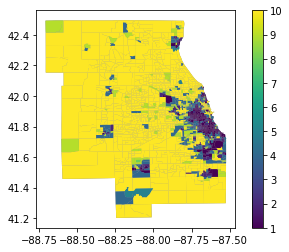

There are 0 NaN census tracts


In [41]:
print('ORIGINAL METHODOLOGY - 2000 CATEGORIES')
ax = city_shp.plot(color = 'grey')
city_shp[~city_shp['inc_cat_80120_00'].isna()].plot(ax = ax, column = 'inc_cat_80120_00', legend = True)
plt.show()
print('There are',city_shp['inc_cat_80120_00'].isna().sum(), 'NaN census tracts')

NEW METHODOLOGY - 2000 CATEGORIES


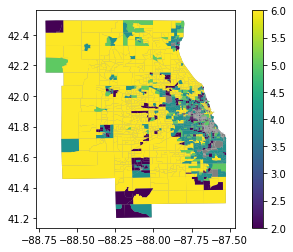

There are 282 NaN census tracts


In [42]:
print('NEW METHODOLOGY - 2000 CATEGORIES')
ax = city_shp.plot(color = 'grey')
city_shp[~city_shp['inc_cat_55cut_80120_medhhinc_00'].isna()].plot(ax = ax, column = 'inc_cat_55cut_80120_medhhinc_00', legend = True)
plt.show()
print('There are',city_shp['inc_cat_55cut_80120_medhhinc_00'].isna().sum(), 'NaN census tracts')

NEW METHODOLOGY - 2017 CATEGORIES


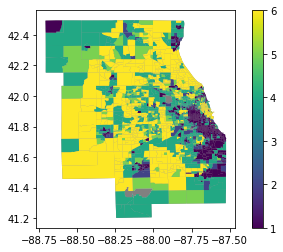

There are 6 NaN census tracts


In [43]:
print('NEW METHODOLOGY - 2017 CATEGORIES')
ax = city_shp.plot(color = 'grey')
city_shp[~city_shp['inc_cat_55cut_80120_medhhinc'].isna()].plot(ax = ax, column = 'inc_cat_55cut_80120_medhhinc', legend = True)
plt.show()
print('There are',city_shp['inc_cat_55cut_80120_medhhinc'].isna().sum(), 'NaN census tracts')